Research question: What is the relationship between how many post-secondary education centers are in a state and how religious that state is?

Data sources:
https://data.world/dhs/colleges-and-universities
https://data.world/wendyhe/how-religious-is-your-state (original source: http://www.pewforum.org/2015/11/03/u-s-public-becoming-less-religious/, https://www.pewresearch.org/fact-tank/2016/02/29/how-religious-is-your-state/?state=alaska)
https://worldpopulationreview.com/state-rankings/educational-attainment-by-state (original source: https://www.census.gov/data/tables/2018/demo/education-attainment/cps-detailed-tables.html)

In [2]:
import pandas as pd
import numpy as np

# Colleges and university data
coluniv_df = pd.read_csv('Colleges_and_Universities.csv')
coluniv_df = coluniv_df.drop(columns=['X', 'Y', 'FID', 'IPEDSID', 'ADDRESS', 'ADDRESS2', 'ZIP', 'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'COUNTYFIPS', 'COUNTRY', 'LATITUDE', 'LONGITUDE', 'SOURCE', 'SOURCE_DAT', 'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'STFIPS', 'COFIPS', 'SECTOR', 'LEVEL_', 'HI_OFFER', 'DEG_GRANT', 'LOCALE', 'CLOSE_DATE', 'MERGE_ID', 'ALIAS'])

# Pew Research Religious Membership study
rel_df = pd.read_csv('US-Religion-Census-Religious-Congregations-and-Membership-Study-2010.csv')

# Education Attainment data
education_df = pd.read_csv('education-attainment.csv') # this doesn't have DC

In [3]:
# coluniv_df
# coluniv_df.loc[coluniv_df['STATE'] == 'KY']


states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

us_state_abbrev = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
}

def total_schools(state, new_df):

    business = 0
    computer_training = 0
    college = 0
    junior_college = 0
    cosmetology = 0
    educ_support = 0
    fine_arts = 0
    flight_training = 0
    other_technical = 0

    for index, row in coluniv_df.iterrows():
        row_state = row['STATE']

        if row_state == state:
            if row['NAICS_DESC'] == 'Business and Secretarial Schools':
                business += 1
            elif row['NAICS_DESC'] == 'Colleges, Universities, and Professional Schools':
                college += 1
            elif row['NAICS_DESC'] == 'Computer Training':
                computer_training += 1
            elif row['NAICS_DESC'] == 'Cosmetology and Barber Schools':
                cosmetology += 1
            elif row['NAICS_DESC'] == 'Educational Support Servies/Closed':
                educ_support += 1
            elif row['NAICS_DESC'] == 'Fine Arts Schools':
                fine_arts += 1
            elif row['NAICS_DESC'] == 'Flight Training':
                flight_training += 1
            elif row['NAICS_DESC'] == 'Junior Colleges':
                junior_college += 1
            elif row['NAICS_DESC'] == 'Other Technical and Trade Schools':
                other_technical += 1
                
    data = {'State': us_state_abbrev[state], 'Business and Secretarial Schools': business,
            'Colleges, Universities, and Professional Schools': college,
            'Computer Training': computer_training,
            'Cosmetology and Barber Schools': cosmetology,
            'Educational Support Servies/Closed': educ_support,
            'Fine Arts Schools': fine_arts,
            'Flight Training': flight_training,
            'Junior Colleges': junior_college,
            'Other Technical and Trade Schools': other_technical}
                
    new_df = new_df.append(data, ignore_index = True)
    return new_df
                
school_summary_df = pd.DataFrame()

for state in states:
    school_summary_df = total_schools(state, school_summary_df)

# school_summary_df


In [4]:
rel_df['Estimated Population'] = rel_df['Total Number of Adherents']/(rel_df['Rates of Adherence per 1,000 Population']/1000)
rel_df = rel_df.rename(columns={'State Name': 'State'})
coluniv_df = coluniv_df.rename(columns={'STATE': 'State'})

In [5]:
all_df = rel_df.merge(education_df, on = ['State'])

all_df = all_df.merge(school_summary_df, on = ['State'])

all_df

,State,Total Number of Congregations,Total Number of Adherents,"Rates of Adherence per 1,000 Population",% of Adults Who Are Highly Religious,% of Adults Who Say Religion Is Very Important In Their Lives,Estimated Population,Percent High School Or Higher,Percent Bachelors Or Higher,Business and Secretarial Schools,"Colleges, Universities, and Professional Schools",Computer Training,Cosmetology and Barber Schools,Educational Support Servies/Closed,Fine Arts Schools,Flight Training,Junior Colleges,Other Technical and Trade Schools
0,Alabama,10514,3007553,629.23,0.77,77,4.779736e+06,86.2,25.5,0.0,41.0,0.0,10.0,0.0,0.0,0.0,38.0,3.0
1,Alaska,1246,240833,339.09,0.45,41,7.102333e+05,92.8,29.6,0.0,7.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
2,Arizona,4673,2379928,372.33,0.53,51,6.391986e+06,87.1,29.5,0.0,41.0,1.0,35.0,0.0,3.0,0.0,46.0,13.0
3,Arkansas,6697,1614357,553.64,0.70,70,2.915897e+06,86.6,23.0,0.0,26.0,1.0,27.0,0.0,0.0,0.0,26.0,7.0
4,California,23558,16765751,450.04,0.49,47,3.725391e+07,83.3,33.9,6.0,255.0,6.0,124.0,0.0,3.0,0.0,219.0,139.0
5,Colorado,4188,1902282,378.25,0.47,47,5.029166e+06,91.7,40.9,0.0,57.0,1.0,28.0,0.0,2.0,0.0,38.0,11.0
6,Connecticut,2597,1830862,512.26,0.43,42,3.574087e+06,90.6,39.3,3.0,29.0,0.0,13.0,0.0,0.0,1.0,20.0,33.0
7,Delaware,831,374917,417.53,0.52,46,8.979403e+05,90.0,32.0,2.0,8.0,0.0,3.0,0.0,0.0,0.0,4.0,3.0
8,Florida,15611,7357588,391.33,0.54,53,1.880149e+07,88.2,29.9,2.0,131.0,3.0,76.0,0.0,1.0,4.0,112.0,71.0
9,Georgia,12292,4924376,508.31,0.66,64,9.687742e+06,87.1,31.3,0.0,78.0,1.0,27.0,0.0,2.0,1.0,69.0,15.0


In [6]:
df2 = all_df.sort_values('Total Number of Congregations')
df2

,State,Total Number of Congregations,Total Number of Adherents,"Rates of Adherence per 1,000 Population",% of Adults Who Are Highly Religious,% of Adults Who Say Religion Is Very Important In Their Lives,Estimated Population,Percent High School Or Higher,Percent Bachelors Or Higher,Business and Secretarial Schools,"Colleges, Universities, and Professional Schools",Computer Training,Cosmetology and Barber Schools,Educational Support Servies/Closed,Fine Arts Schools,Flight Training,Junior Colleges,Other Technical and Trade Schools
38,Rhode Island,677,576919,548.11,0.49,48,1.052561e+06,88.8,34.2,0.0,12.0,0.0,5.0,0.0,0.0,0.0,2.0,5.0
7,Delaware,831,374917,417.53,0.52,46,8.979403e+05,90.0,32.0,2.0,8.0,0.0,3.0,0.0,0.0,0.0,4.0,3.0
44,Vermont,854,210391,336.23,0.34,32,6.257354e+05,92.7,38.0,0.0,21.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0
49,Wyoming,948,223074,395.78,0.54,49,5.636313e+05,93.2,27.4,0.0,2.0,0.0,1.0,0.0,0.0,0.0,9.0,0.0
28,New Hampshire,1025,462772,351.52,0.33,33,1.316488e+06,93.1,37.0,0.0,20.0,0.0,10.0,0.0,1.0,0.0,9.0,4.0
1,Alaska,1246,240833,339.09,0.45,41,7.102333e+05,92.8,29.6,0.0,7.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
10,Hawaii,1314,561980,413.13,0.47,44,1.360298e+06,92.0,33.0,0.0,13.0,1.0,2.0,0.0,0.0,0.0,8.0,4.0
27,Nevada,1392,927955,343.62,0.49,44,2.700527e+06,86.7,24.7,0.0,16.0,0.0,14.0,0.0,0.0,0.0,11.0,9.0
33,North Dakota,1498,451456,671.22,0.53,53,6.725902e+05,92.6,30.0,0.0,12.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0
18,Maine,1574,367043,276.31,0.34,34,1.328374e+06,92.6,31.8,0.0,21.0,0.0,4.0,0.0,1.0,0.0,11.0,4.0


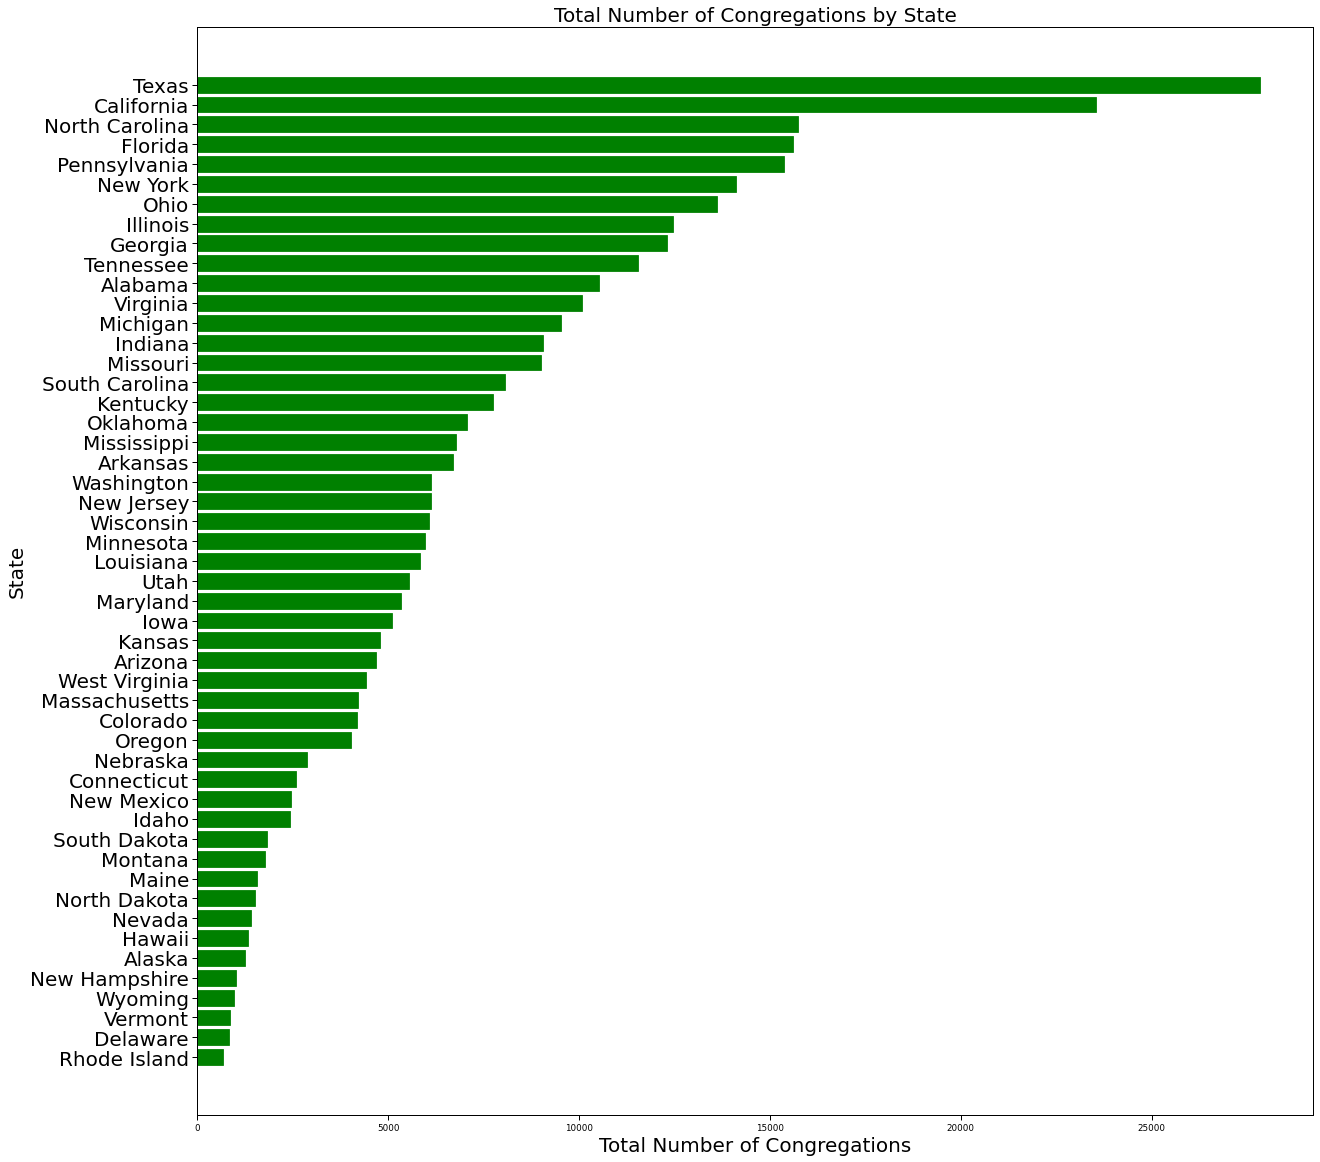

In [7]:
import matplotlib.pyplot as plt

frequencies = df2['Total Number of Congregations']
x_labels = df2['State']

plt.figure(figsize=(20, 20))

plt.barh(range(len(frequencies)), frequencies, color="green", 
     edgecolor='green', tick_label=x_labels)
plt.yticks(fontsize=20)
plt.ylabel('State', fontsize=20)
plt.xlabel('Total Number of Congregations', fontsize=20)
plt.title('Total Number of Congregations by State', fontsize=20)
plt.show()

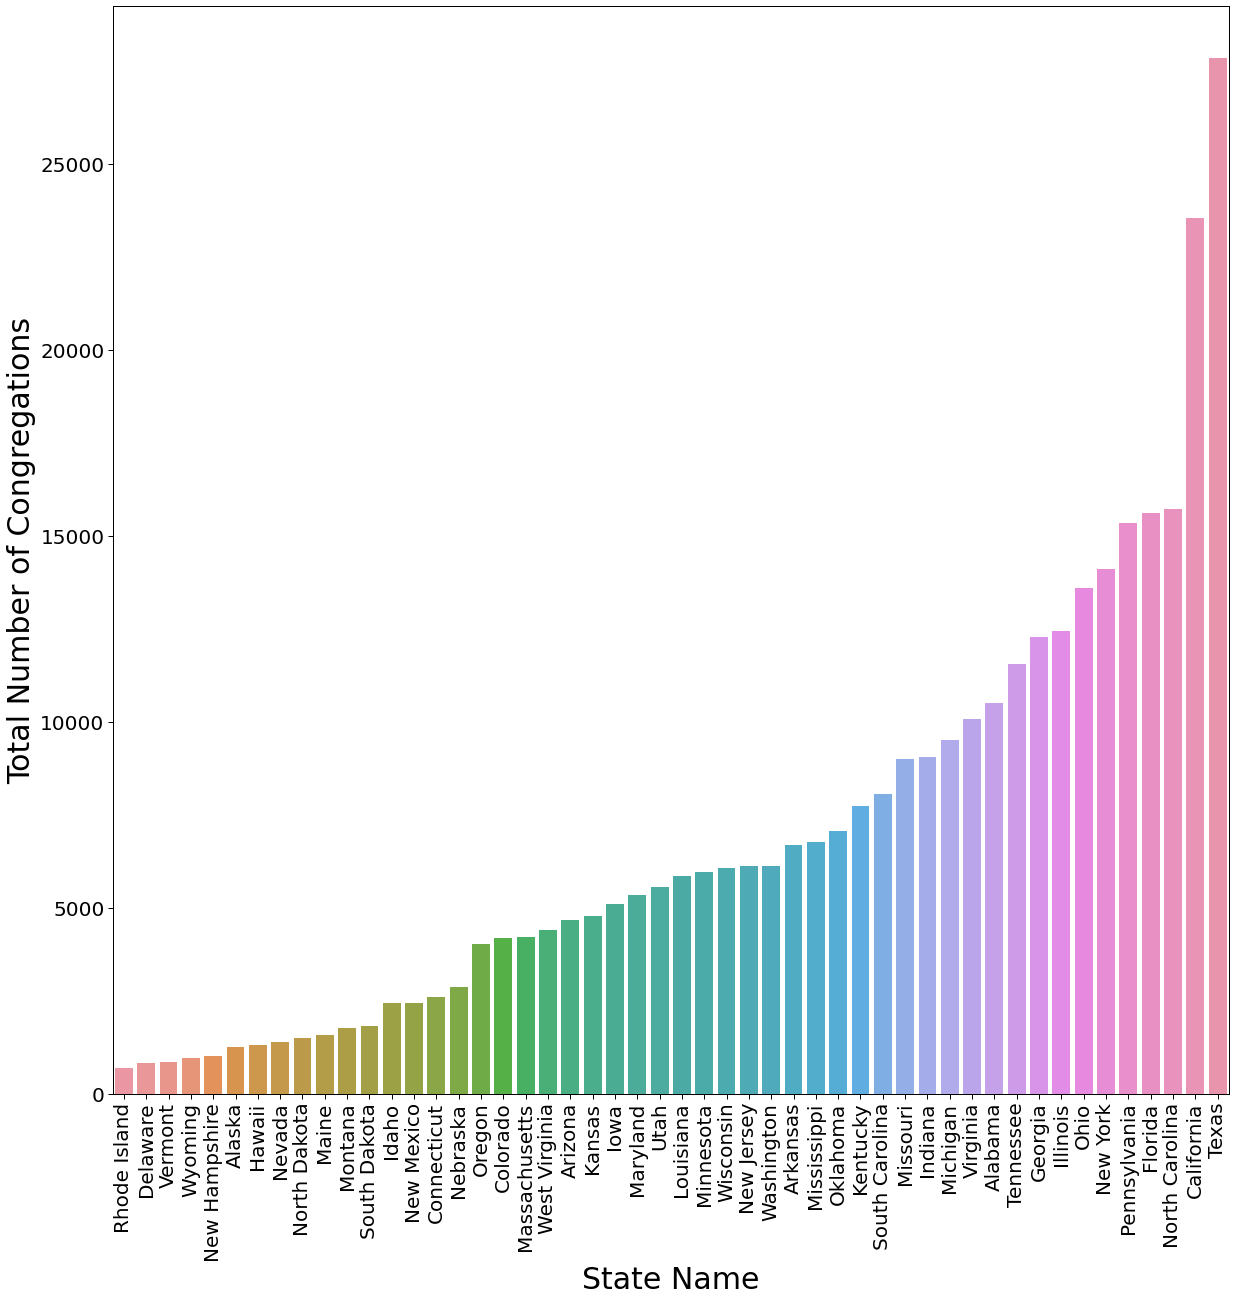

In [8]:
import seaborn as sns

sns.set_context('paper')

plt.figure(figsize=(20, 20))

b = sns.barplot(x="State", y = "Total Number of Congregations", data = df2)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
b.set_xlabel("State Name", fontsize=30)
b.set_ylabel("Total Number of Congregations", fontsize=30)

plt.show()

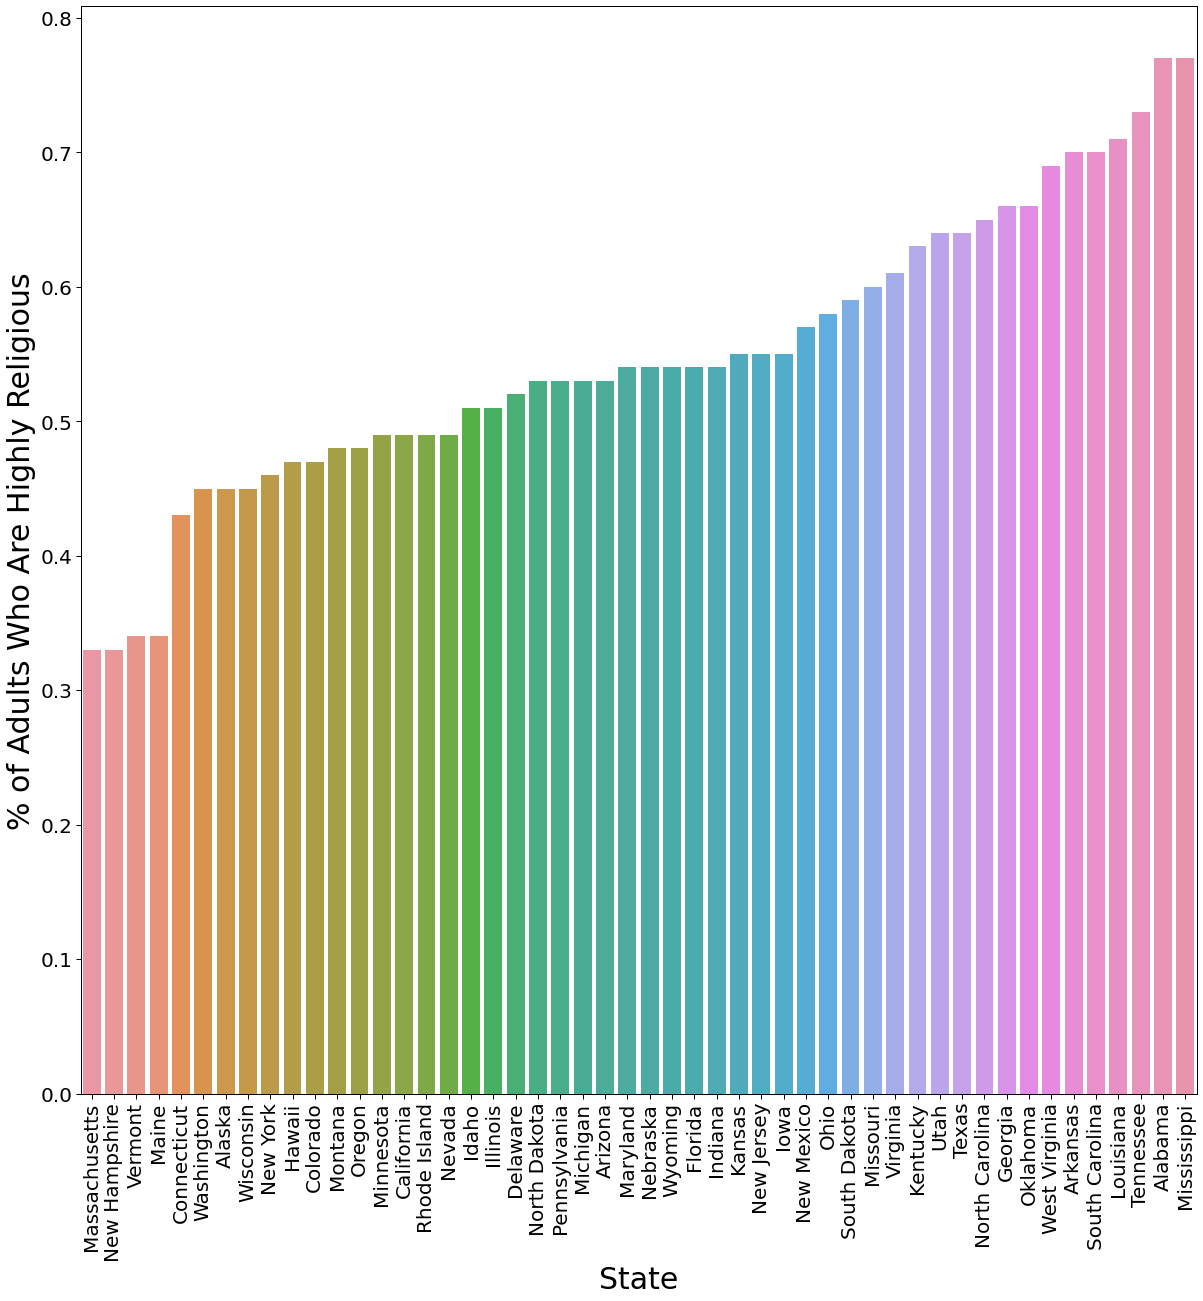

In [9]:
df3 = df2.sort_values('% of Adults Who Are Highly Religious')

import seaborn as sns

sns.set_context('paper')

plt.figure(figsize=(20, 20))

b = sns.barplot(x="State", y = "% of Adults Who Are Highly Religious", data = df3)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
b.set_xlabel("State", fontsize=30)
b.set_ylabel("% of Adults Who Are Highly Religious", fontsize=30)

plt.show()

In [10]:
# Congregations per 1000 people

all_df['Congregations Per 1000 People'] = (all_df['Total Number of Congregations']/ all_df['Estimated Population']) * 1000

# Colleges, Universities, and Professional Schools per 1000 people

all_df['Universities per 1000 People'] = ((all_df['Colleges, Universities, and Professional Schools'] + all_df['Junior Colleges'] + all_df['Fine Arts Schools'] + all_df['Other Technical and Trade Schools'])/ all_df['Estimated Population']) * 1000

df3 = all_df.sort_values('Congregations Per 1000 People')
df3

,State,Total Number of Congregations,Total Number of Adherents,"Rates of Adherence per 1,000 Population",% of Adults Who Are Highly Religious,% of Adults Who Say Religion Is Very Important In Their Lives,Estimated Population,Percent High School Or Higher,Percent Bachelors Or Higher,Business and Secretarial Schools,"Colleges, Universities, and Professional Schools",Computer Training,Cosmetology and Barber Schools,Educational Support Servies/Closed,Fine Arts Schools,Flight Training,Junior Colleges,Other Technical and Trade Schools,Congregations Per 1000 People,Universities per 1000 People
27,Nevada,1392,927955,343.62,0.49,44,2.700527e+06,86.7,24.7,0.0,16.0,0.0,14.0,0.0,0.0,0.0,11.0,9.0,0.515455,0.013331
4,California,23558,16765751,450.04,0.49,47,3.725391e+07,83.3,33.9,6.0,255.0,6.0,124.0,0.0,3.0,0.0,219.0,139.0,0.632363,0.016535
20,Massachusetts,4200,3748058,572.43,0.33,33,6.547627e+06,90.8,43.7,0.0,96.0,0.0,28.0,0.0,2.0,1.0,29.0,39.0,0.641454,0.025353
38,Rhode Island,677,576919,548.11,0.49,48,1.052561e+06,88.8,34.2,0.0,12.0,0.0,5.0,0.0,0.0,0.0,2.0,5.0,0.643193,0.018051
29,New Jersey,6114,4809520,547.04,0.55,50,8.791898e+06,89.8,39.7,10.0,46.0,0.0,25.0,0.0,2.0,0.0,25.0,58.0,0.695413,0.014900
6,Connecticut,2597,1830862,512.26,0.43,42,3.574087e+06,90.6,39.3,3.0,29.0,0.0,13.0,0.0,0.0,1.0,20.0,33.0,0.726619,0.022943
31,New York,14110,9923512,512.10,0.46,45,1.937807e+07,86.8,36.6,9.0,230.0,6.0,45.0,0.0,5.0,1.0,85.0,94.0,0.728143,0.021364
2,Arizona,4673,2379928,372.33,0.53,51,6.391986e+06,87.1,29.5,0.0,41.0,1.0,35.0,0.0,3.0,0.0,46.0,13.0,0.731072,0.016114
28,New Hampshire,1025,462772,351.52,0.33,33,1.316488e+06,93.1,37.0,0.0,20.0,0.0,10.0,0.0,1.0,0.0,9.0,4.0,0.778586,0.025826
8,Florida,15611,7357588,391.33,0.54,53,1.880149e+07,88.2,29.9,2.0,131.0,3.0,76.0,0.0,1.0,4.0,112.0,71.0,0.830306,0.016754


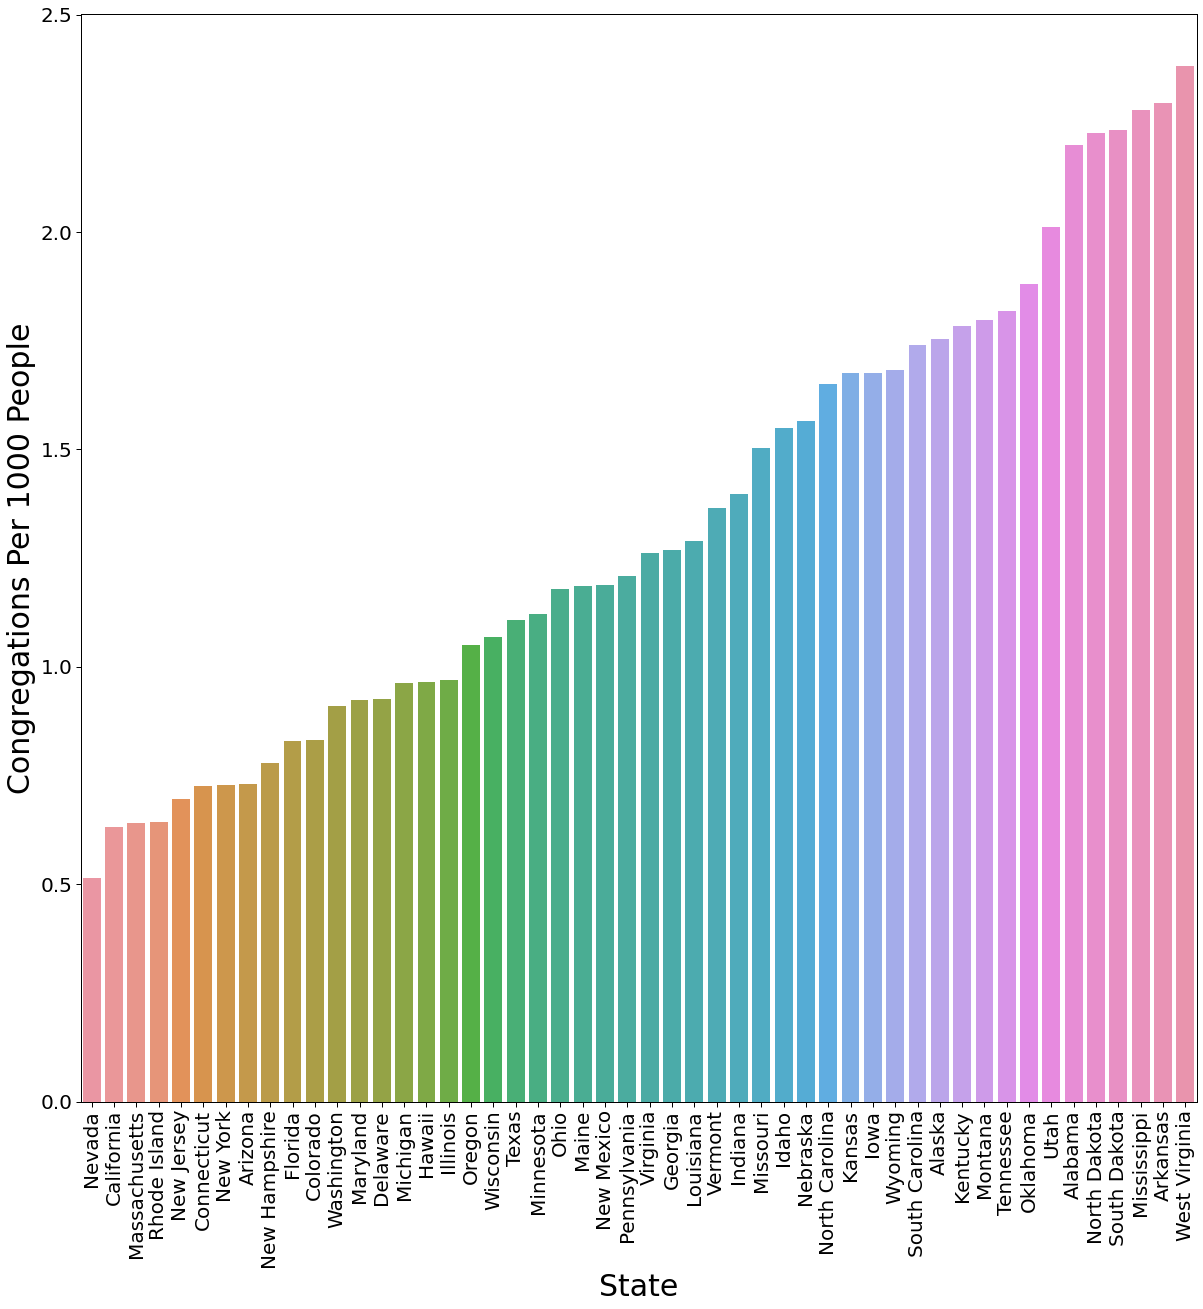

In [11]:
import seaborn as sns

sns.set_context('paper')

plt.figure(figsize=(20, 20))

b = sns.barplot(x="State", y = "Congregations Per 1000 People", data = df3)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
b.set_xlabel("State", fontsize=30)
b.set_ylabel("Congregations Per 1000 People", fontsize=30)

plt.show()

In [12]:
all_df['Religious Adherence Level'] = pd.qcut(all_df['Rates of Adherence per 1,000 Population'], q=[0, 0.25, 0.75, 1.0], labels =['low','medium','high'])
all_df

,State,Total Number of Congregations,Total Number of Adherents,"Rates of Adherence per 1,000 Population",% of Adults Who Are Highly Religious,% of Adults Who Say Religion Is Very Important In Their Lives,Estimated Population,Percent High School Or Higher,Percent Bachelors Or Higher,Business and Secretarial Schools,...,Computer Training,Cosmetology and Barber Schools,Educational Support Servies/Closed,Fine Arts Schools,Flight Training,Junior Colleges,Other Technical and Trade Schools,Congregations Per 1000 People,Universities per 1000 People,Religious Adherence Level
0,Alabama,10514,3007553,629.23,0.77,77,4.779736e+06,86.2,25.5,0.0,...,0.0,10.0,0.0,0.0,0.0,38.0,3.0,2.199703,0.017156,high
1,Alaska,1246,240833,339.09,0.45,41,7.102333e+05,92.8,29.6,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.754353,0.015488,low
2,Arizona,4673,2379928,372.33,0.53,51,6.391986e+06,87.1,29.5,0.0,...,1.0,35.0,0.0,3.0,0.0,46.0,13.0,0.731072,0.016114,low
3,Arkansas,6697,1614357,553.64,0.70,70,2.915897e+06,86.6,23.0,0.0,...,1.0,27.0,0.0,0.0,0.0,26.0,7.0,2.296721,0.020234,high
4,California,23558,16765751,450.04,0.49,47,3.725391e+07,83.3,33.9,6.0,...,6.0,124.0,0.0,3.0,0.0,219.0,139.0,0.632363,0.016535,medium
5,Colorado,4188,1902282,378.25,0.47,47,5.029166e+06,91.7,40.9,0.0,...,1.0,28.0,0.0,2.0,0.0,38.0,11.0,0.832742,0.021475,low
6,Connecticut,2597,1830862,512.26,0.43,42,3.574087e+06,90.6,39.3,3.0,...,0.0,13.0,0.0,0.0,1.0,20.0,33.0,0.726619,0.022943,medium
7,Delaware,831,374917,417.53,0.52,46,8.979403e+05,90.0,32.0,2.0,...,0.0,3.0,0.0,0.0,0.0,4.0,3.0,0.925451,0.016705,medium
8,Florida,15611,7357588,391.33,0.54,53,1.880149e+07,88.2,29.9,2.0,...,3.0,76.0,0.0,1.0,4.0,112.0,71.0,0.830306,0.016754,low
9,Georgia,12292,4924376,508.31,0.66,64,9.687742e+06,87.1,31.3,0.0,...,1.0,27.0,0.0,2.0,1.0,69.0,15.0,1.268820,0.016929,medium


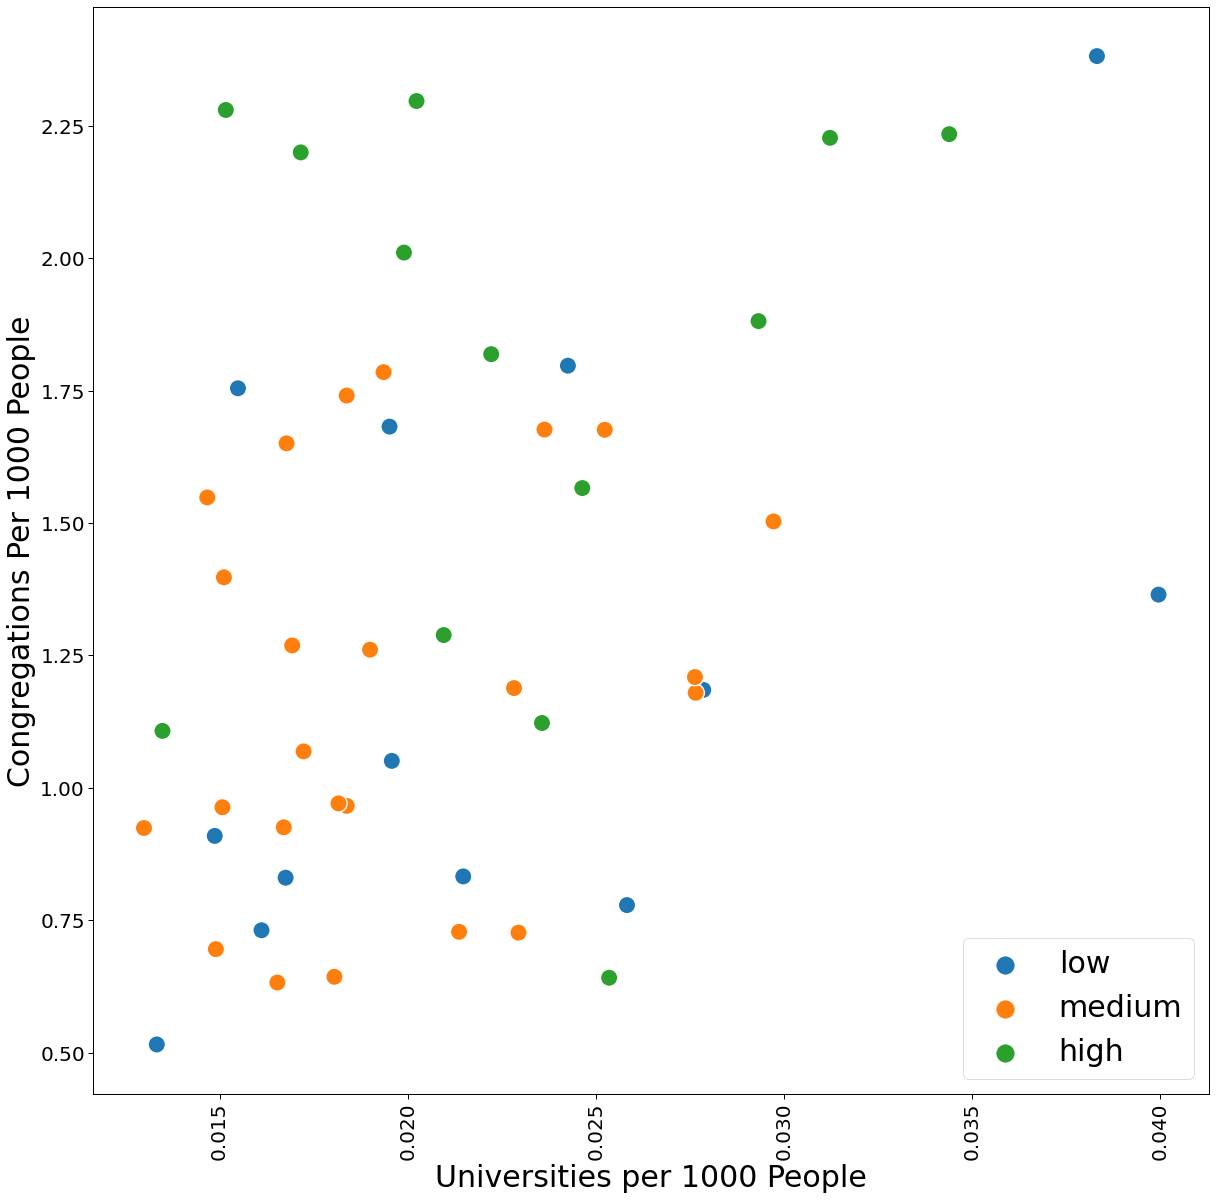

In [13]:
import seaborn as sns

sns.set_context('paper')

plt.figure(figsize=(20, 20))

b = sns.scatterplot(x="Universities per 1000 People", y = "Congregations Per 1000 People", data = all_df, hue="Religious Adherence Level", s = 300)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
lgnd = plt.legend(fontsize=30, title_fontsize=30, loc='lower right')
lgnd.legendHandles[0]._sizes = [300]
lgnd.legendHandles[1]._sizes = [300]
lgnd.legendHandles[2]._sizes = [300]

b.set_xlabel("Universities per 1000 People", fontsize=30)
b.set_ylabel("Congregations Per 1000 People", fontsize=30)

plt.show()

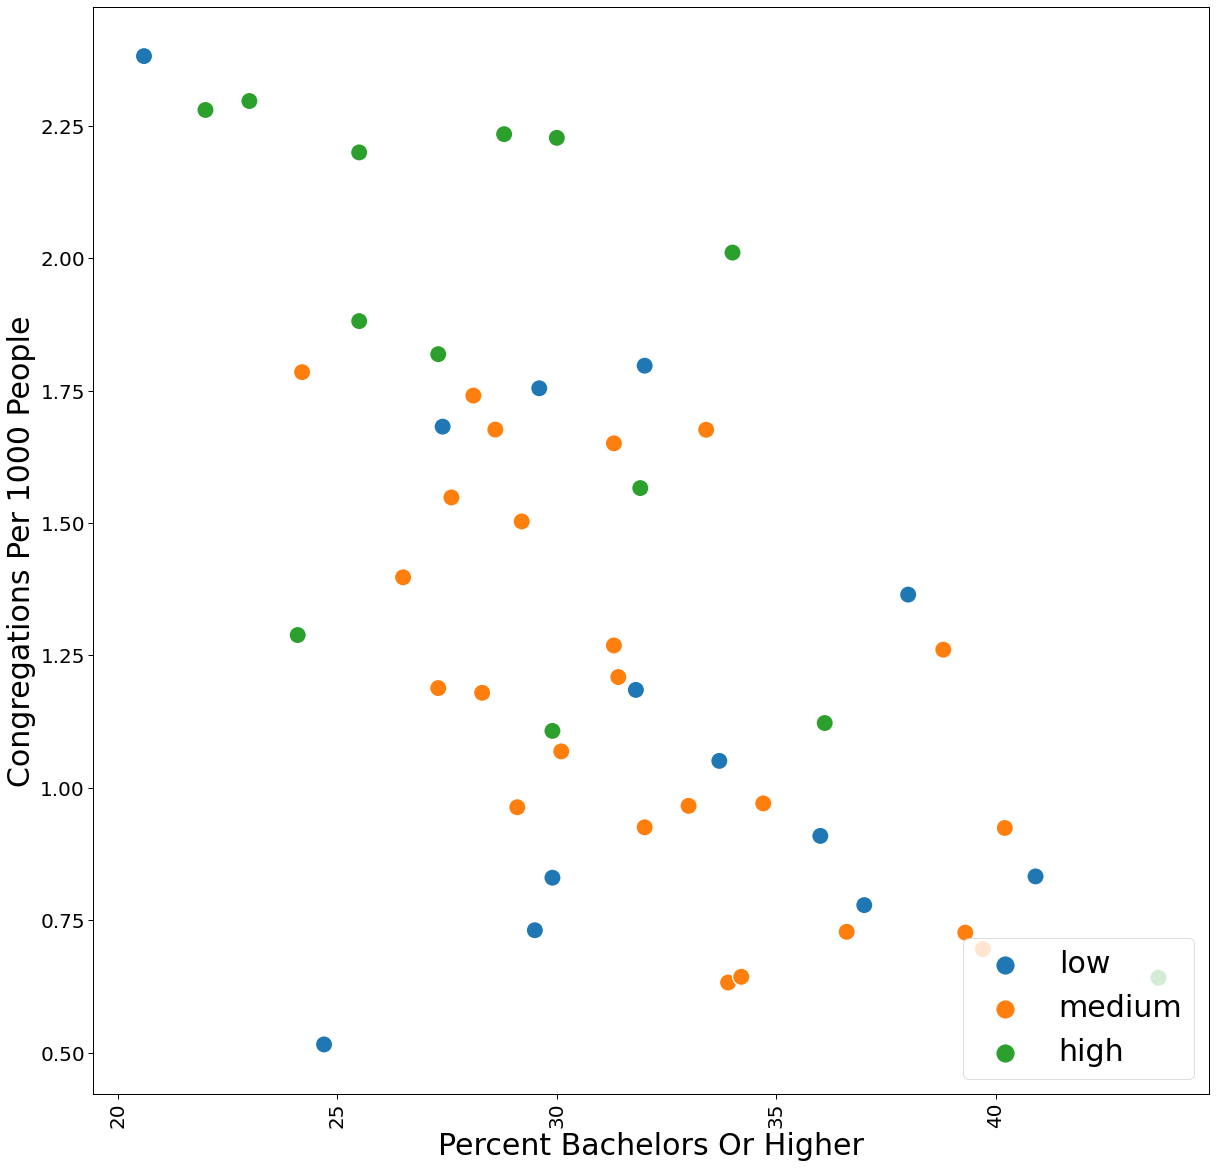

In [14]:
import seaborn as sns

def scatterplot(x, y, x_label, y_label, hue):

    sns.set_context('paper')

    plt.figure(figsize=(20, 20))

    b = sns.scatterplot(x=x, y =y, data = all_df, hue=hue, s = 300)
    plt.xticks(rotation=90, fontsize=20)
    plt.yticks(fontsize=20)
    lgnd = plt.legend(fontsize=30, title_fontsize=30, loc='lower right')
    lgnd.legendHandles[0]._sizes = [300]
    lgnd.legendHandles[1]._sizes = [300]
    lgnd.legendHandles[2]._sizes = [300]

    b.set_xlabel(x_label, fontsize=30)
    b.set_ylabel(y_label, fontsize=30)

    plt.show()
  
hue = "Religious Adherence Level"
x = 'Percent Bachelors Or Higher'
y = 'Congregations Per 1000 People'
scatterplot(all_df[x], all_df[y], x, y, hue)

In [15]:
all_df['% of Adults Who Say Religion Is Very Important In Their Lives'] = all_df['% of Adults Who Say Religion Is Very Important In Their Lives']/100
all_df['Religion Is Important Level'] = pd.qcut(all_df['% of Adults Who Say Religion Is Very Important In Their Lives'], q=[0, 0.25, 0.75, 1.0], labels =['low','medium','high'])

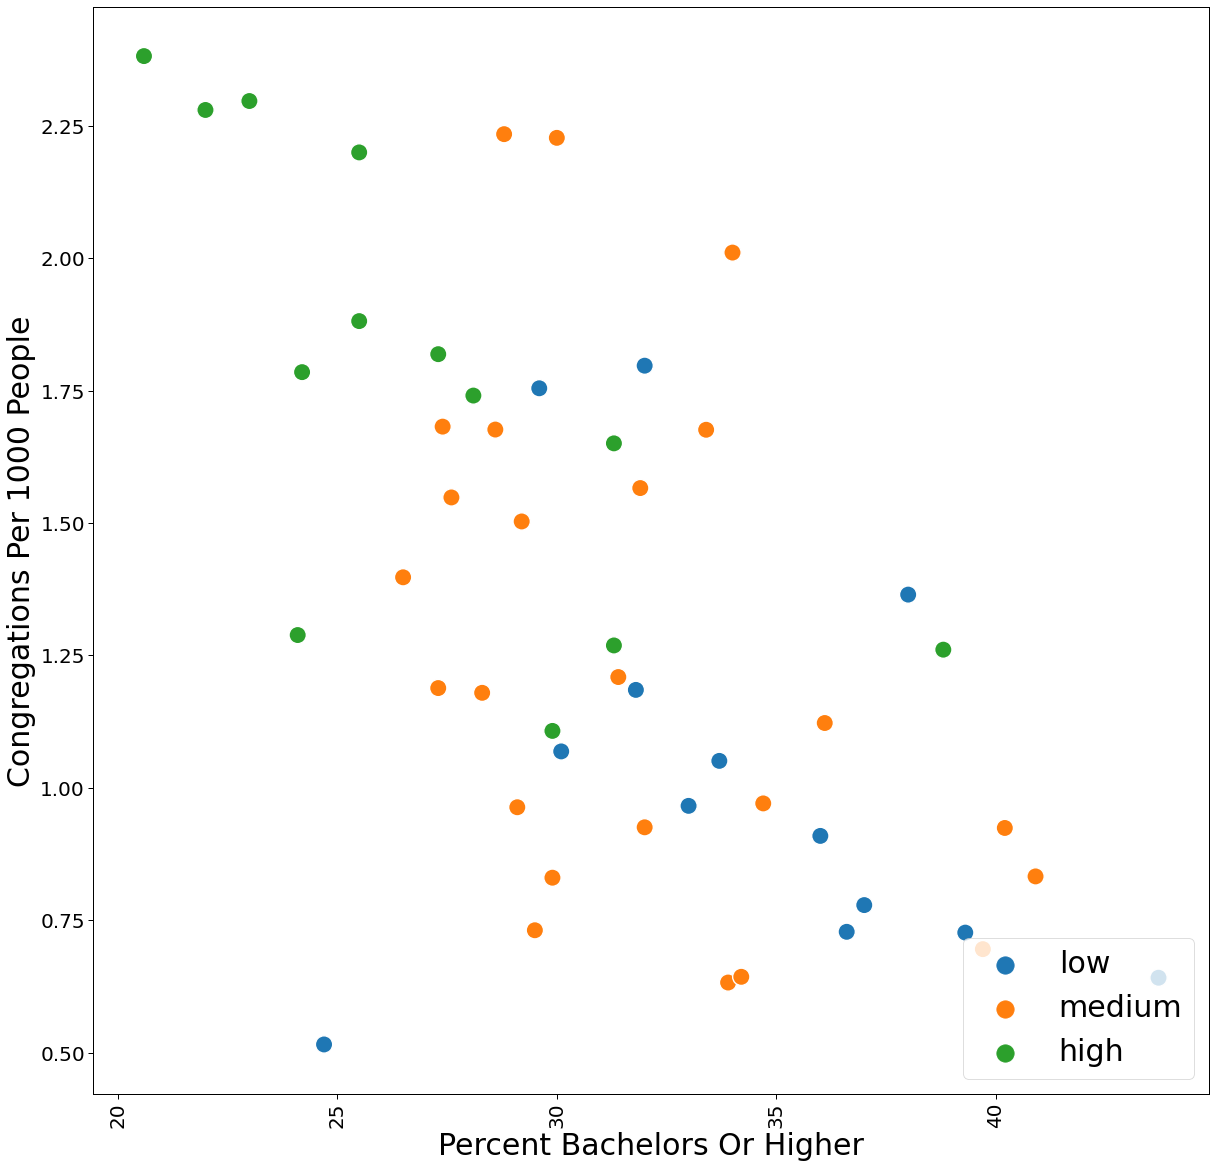

In [16]:
hue = 'Religion Is Important Level'
x = 'Percent Bachelors Or Higher'
y = 'Congregations Per 1000 People'
scatterplot(all_df[x], all_df[y], x, y, hue)

In [17]:
# Religion is important level model
from sklearn.model_selection import train_test_split

X = all_df.drop(['% of Adults Who Say Religion Is Very Important In Their Lives', '% of Adults Who Are Highly Religious', 'Rates of Adherence per 1,000 Population', 'State', 'Total Number of Congregations', 'Total Number of Adherents', 'Estimated Population', 'Religious Adherence Level', 'Religion Is Important Level', 'Business and Secretarial Schools', 'Colleges, Universities, and Professional Schools', 'Computer Training', 'Cosmetology and Barber Schools', 'Educational Support Servies/Closed', 'Fine Arts Schools', 'Flight Training', 'Junior Colleges', 'Other Technical and Trade Schools'], axis=1)
y = all_df['Religion Is Important Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 6) # 6 neighbors gives pretty good results 80% accuracy
knn.fit(X_train, y_train)

X_train.shape

(40, 4)

In [19]:
pred = knn.predict(X_test)
pred

array(['low', 'low', 'low', 'medium', 'high', 'medium', 'high', 'low',
       'high', 'medium'], dtype=object)

In [20]:
knn.score(X_test, y_test)

0.2

In [21]:
# Religious Adherence Level model
from sklearn.model_selection import train_test_split

X = all_df.drop(['% of Adults Who Say Religion Is Very Important In Their Lives', '% of Adults Who Are Highly Religious', 'Rates of Adherence per 1,000 Population', 'State', 'Total Number of Congregations', 'Total Number of Adherents', 'Estimated Population', 'Religious Adherence Level', 'Religion Is Important Level', 'Business and Secretarial Schools', 'Colleges, Universities, and Professional Schools', 'Computer Training', 'Cosmetology and Barber Schools', 'Educational Support Servies/Closed', 'Fine Arts Schools', 'Flight Training', 'Junior Colleges', 'Other Technical and Trade Schools'], axis=1)
y = all_df['Religious Adherence Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2) # 6 neighbors gives pretty good results 80% accuracy
knn.fit(X_train, y_train)

X_train.shape

(40, 4)

In [23]:
pred = knn.predict(X_test)
pred

array(['high', 'low', 'low', 'high', 'high', 'medium', 'low', 'low',
       'high', 'high'], dtype=object)

In [24]:
knn.score(X_test, y_test) # Wow, 100% accuracy...

0.1

In [25]:
X_test

,Percent High School Or Higher,Percent Bachelors Or Higher,Congregations Per 1000 People,Universities per 1000 People
37,90.5,31.4,1.209146,0.027633
45,89.7,38.8,1.260848,0.018998
6,90.6,39.3,0.726619,0.022943
44,92.7,38.0,1.364794,0.039953
13,88.8,26.5,1.397480,0.015115
36,90.7,33.7,1.050884,0.019577
8,88.2,29.9,0.830306,0.016754
29,89.8,39.7,0.695413,0.014900
4,83.3,33.9,0.632363,0.016535
49,93.2,27.4,1.681951,0.019516


In [26]:
y_test

37    medium
45    medium
6     medium
44       low
13    medium
36       low
8        low
29    medium
4     medium
49       low
Name: Religious Adherence Level, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [27]:
# Try Naive Bayes
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score

X = all_df.drop(['% of Adults Who Say Religion Is Very Important In Their Lives', '% of Adults Who Are Highly Religious', 'Rates of Adherence per 1,000 Population', 'State', 'Total Number of Congregations', 'Total Number of Adherents', 'Estimated Population', 'Religious Adherence Level', 'Religion Is Important Level', 'Business and Secretarial Schools', 'Colleges, Universities, and Professional Schools', 'Computer Training', 'Cosmetology and Barber Schools', 'Educational Support Servies/Closed', 'Fine Arts Schools', 'Flight Training', 'Junior Colleges', 'Other Technical and Trade Schools'], axis=1)
y = all_df['Religious Adherence Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 52)

model = MultinomialNB() # MultinomialNB()
model = model.fit(X_train, y_train)

# training accuracy
model.score(X_train, y_train)

0.4864864864864865

In [28]:
y_pred = model.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred) * 100
accuracy

46.15384615384615

In [30]:
# Try it again
# Try Naive Bayes
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score

X = all_df.drop(['% of Adults Who Say Religion Is Very Important In Their Lives', '% of Adults Who Are Highly Religious', 'Rates of Adherence per 1,000 Population', 'State', 'Total Number of Congregations', 'Total Number of Adherents', 'Estimated Population', 'Religious Adherence Level', 'Religion Is Important Level', 'Business and Secretarial Schools', 'Colleges, Universities, and Professional Schools', 'Computer Training', 'Cosmetology and Barber Schools', 'Educational Support Servies/Closed', 'Fine Arts Schools', 'Flight Training', 'Junior Colleges', 'Other Technical and Trade Schools'], axis=1)
y = all_df['Religion Is Important Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 52)

model = MultinomialNB() # MultinomialNB()
model = model.fit(X_train, y_train)

# training accuracy
model.score(X_train, y_train)

0.5675675675675675

In [31]:
y_pred = model.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred) * 100
accuracy

53.84615384615385

In [33]:
# Let's add in some political data
political_df = pd.read_csv('political-party-affiliation-by-state.csv')
# https://en.wikipedia.org/wiki/Political_party_strength_in_U.S._states
# https://www.pewforum.org/religious-landscape-study/compare/party-affiliation/by/state/
political_df

,State,Republican/lean Rep.,No lean,Democrat/lean Dem.,Sample Size,2020 Presidential Election,Governor
0,Alabama,52,13,35,511,R,R
1,Alaska,39,29,32,310,R,R
2,Arizona,40,21,39,653,D,R
3,Arkansas,46,16,38,311,R,R
4,California,30,21,49,3697,D,D
5,Colorado,41,17,42,504,D,D
6,Connecticut,32,18,50,377,D,D
7,Delaware,29,17,55,301,D,D
8,District of Columbia,11,15,73,303,None,None
9,Florida,37,19,40,2020,R,R


In [34]:
all_political_df = all_df.merge(political_df, on = ['State'])
all_political_df

,State,Total Number of Congregations,Total Number of Adherents,"Rates of Adherence per 1,000 Population",% of Adults Who Are Highly Religious,% of Adults Who Say Religion Is Very Important In Their Lives,Estimated Population,Percent High School Or Higher,Percent Bachelors Or Higher,Business and Secretarial Schools,...,Congregations Per 1000 People,Universities per 1000 People,Religious Adherence Level,Religion Is Important Level,Republican/lean Rep.,No lean,Democrat/lean Dem.,Sample Size,2020 Presidential Election,Governor
0,Alabama,10514,3007553,629.23,0.77,0.77,4.779736e+06,86.2,25.5,0.0,...,2.199703,0.017156,high,high,52,13,35,511,R,R
1,Alaska,1246,240833,339.09,0.45,0.41,7.102333e+05,92.8,29.6,0.0,...,1.754353,0.015488,low,low,39,29,32,310,R,R
2,Arizona,4673,2379928,372.33,0.53,0.51,6.391986e+06,87.1,29.5,0.0,...,0.731072,0.016114,low,medium,40,21,39,653,D,R
3,Arkansas,6697,1614357,553.64,0.70,0.70,2.915897e+06,86.6,23.0,0.0,...,2.296721,0.020234,high,high,46,16,38,311,R,R
4,California,23558,16765751,450.04,0.49,0.47,3.725391e+07,83.3,33.9,6.0,...,0.632363,0.016535,medium,medium,30,21,49,3697,D,D
5,Colorado,4188,1902282,378.25,0.47,0.47,5.029166e+06,91.7,40.9,0.0,...,0.832742,0.021475,low,medium,41,17,42,504,D,D
6,Connecticut,2597,1830862,512.26,0.43,0.42,3.574087e+06,90.6,39.3,3.0,...,0.726619,0.022943,medium,low,32,18,50,377,D,D
7,Delaware,831,374917,417.53,0.52,0.46,8.979403e+05,90.0,32.0,2.0,...,0.925451,0.016705,medium,medium,29,17,55,301,D,D
8,Florida,15611,7357588,391.33,0.54,0.53,1.880149e+07,88.2,29.9,2.0,...,0.830306,0.016754,low,medium,37,19,40,2020,R,R
9,Georgia,12292,4924376,508.31,0.66,0.64,9.687742e+06,87.1,31.3,0.0,...,1.268820,0.016929,medium,high,41,18,41,968,D,R


In [58]:
from sklearn import preprocessing

def convert(data):
    number = preprocessing.LabelEncoder()
    data['2020 Presidential Election'] = number.fit_transform(data['2020 Presidential Election'])
    data['Governor'] = number.fit_transform(data['Governor'])
#     data=data.fillna(-999)
    return data

In [46]:
# Try it again
# Try Naive Bayes
# Predicting religion is important level
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score

X = all_political_df.drop(['% of Adults Who Say Religion Is Very Important In Their Lives', '% of Adults Who Are Highly Religious', 'Rates of Adherence per 1,000 Population', 'State', 'Total Number of Congregations', 'Total Number of Adherents', 'Estimated Population', 'Religious Adherence Level', 'Religion Is Important Level', 'Business and Secretarial Schools', 'Colleges, Universities, and Professional Schools', 'Computer Training', 'Cosmetology and Barber Schools', 'Educational Support Servies/Closed', 'Fine Arts Schools', 'Flight Training', 'Junior Colleges', 'Other Technical and Trade Schools', 'Sample Size'], axis=1)
y = all_political_df['Religion Is Important Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 52)
X_train=convert(X_train)
X_test=convert(X_test)

knn = KNeighborsClassifier(n_neighbors = 2) # 6 neighbors gives pretty good results 80% accuracy
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
pred

array(['medium', 'high', 'low', 'high', 'high', 'high', 'medium', 'high',
       'high', 'high', 'low', 'low', 'high'], dtype=object)

In [47]:
knn.score(X_test, y_test)

0.23076923076923078

In [48]:
# Predicting religion adherence level
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score

X = all_political_df.drop(['% of Adults Who Say Religion Is Very Important In Their Lives', '% of Adults Who Are Highly Religious', 'Rates of Adherence per 1,000 Population', 'State', 'Total Number of Congregations', 'Total Number of Adherents', 'Estimated Population', 'Religious Adherence Level', 'Religion Is Important Level', 'Business and Secretarial Schools', 'Colleges, Universities, and Professional Schools', 'Computer Training', 'Cosmetology and Barber Schools', 'Educational Support Servies/Closed', 'Fine Arts Schools', 'Flight Training', 'Junior Colleges', 'Other Technical and Trade Schools', 'Sample Size'], axis=1)
y = all_political_df['Religion Is Important Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 52)
X_train=convert(X_train)
X_test=convert(X_test)

knn = KNeighborsClassifier(n_neighbors = 2) # 6 neighbors gives pretty good results 80% accuracy
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
pred

array(['low', 'high', 'high', 'high', 'high', 'high', 'high', 'medium',
       'medium', 'high', 'medium', 'medium', 'high'], dtype=object)

In [50]:
knn.score(X_test, y_test)

0.23076923076923078

In [51]:
# Try splitting percent bachelors into H, M, L
# same with congregations and universities

,Percent High School Or Higher,Percent Bachelors Or Higher,Congregations Per 1000 People,Universities per 1000 People,Republican/lean Rep.,No lean,Democrat/lean Dem.,2020 Presidential Election,Governor
0,86.2,25.5,2.199703,0.017156,52,13,35,R,R
1,92.8,29.6,1.754353,0.015488,39,29,32,R,R
2,87.1,29.5,0.731072,0.016114,40,21,39,D,R
3,86.6,23.0,2.296721,0.020234,46,16,38,R,R
4,83.3,33.9,0.632363,0.016535,30,21,49,D,D
5,91.7,40.9,0.832742,0.021475,41,17,42,D,D
6,90.6,39.3,0.726619,0.022943,32,18,50,D,D
7,90.0,32.0,0.925451,0.016705,29,17,55,D,D
8,88.2,29.9,0.830306,0.016754,37,19,40,R,R
9,87.1,31.3,1.268820,0.016929,41,18,41,D,R


In [53]:
levels_for_all_df = all_political_df.copy(deep=True)
levels_for_all_df['Bachelors or Higher Level'] = pd.qcut(all_political_df['Percent Bachelors Or Higher'], q=[0, 0.25, 0.75, 1.0], labels =['low','medium','high'])
levels_for_all_df['Congregations Level'] = pd.qcut(all_political_df['Congregations Per 1000 People'], q=[0, 0.25, 0.75, 1.0], labels =['low','medium','high'])
levels_for_all_df['Universities Level'] = pd.qcut(all_political_df['Universities per 1000 People'], q=[0, 0.25, 0.75, 1.0], labels =['low','medium','high'])
levels_for_all_df

,State,Total Number of Congregations,Total Number of Adherents,"Rates of Adherence per 1,000 Population",% of Adults Who Are Highly Religious,% of Adults Who Say Religion Is Very Important In Their Lives,Estimated Population,Percent High School Or Higher,Percent Bachelors Or Higher,Business and Secretarial Schools,...,Religion Is Important Level,Republican/lean Rep.,No lean,Democrat/lean Dem.,Sample Size,2020 Presidential Election,Governor,Bachelors or Higher Level,Congregations Level,Universities Level
0,Alabama,10514,3007553,629.23,0.77,0.77,4.779736e+06,86.2,25.5,0.0,...,high,52,13,35,511,R,R,low,high,medium
1,Alaska,1246,240833,339.09,0.45,0.41,7.102333e+05,92.8,29.6,0.0,...,low,39,29,32,310,R,R,medium,high,low
2,Arizona,4673,2379928,372.33,0.53,0.51,6.391986e+06,87.1,29.5,0.0,...,medium,40,21,39,653,D,R,medium,low,low
3,Arkansas,6697,1614357,553.64,0.70,0.70,2.915897e+06,86.6,23.0,0.0,...,high,46,16,38,311,R,R,low,high,medium
4,California,23558,16765751,450.04,0.49,0.47,3.725391e+07,83.3,33.9,6.0,...,medium,30,21,49,3697,D,D,medium,low,low
5,Colorado,4188,1902282,378.25,0.47,0.47,5.029166e+06,91.7,40.9,0.0,...,medium,41,17,42,504,D,D,high,low,medium
6,Connecticut,2597,1830862,512.26,0.43,0.42,3.574087e+06,90.6,39.3,3.0,...,low,32,18,50,377,D,D,high,low,medium
7,Delaware,831,374917,417.53,0.52,0.46,8.979403e+05,90.0,32.0,2.0,...,medium,29,17,55,301,D,D,medium,medium,low
8,Florida,15611,7357588,391.33,0.54,0.53,1.880149e+07,88.2,29.9,2.0,...,medium,37,19,40,2020,R,R,medium,low,medium
9,Georgia,12292,4924376,508.31,0.66,0.64,9.687742e+06,87.1,31.3,0.0,...,high,41,18,41,968,D,R,medium,medium,medium


In [60]:
def convert(data):
    number = preprocessing.LabelEncoder()
    data['2020 Presidential Election'] = number.fit_transform(data['2020 Presidential Election'])
    data['Governor'] = number.fit_transform(data['Governor'])
    data['Bachelors or Higher Level'] = number.fit.transform(data['Bachelors or Higher Level'])
    data['Congregations Level'] = number.fit.transform(data['Congregations Level'])
    data['Universities Level'] = number.fit.transform(data['Universities Level'])
#     data=data.fillna(-999)
    return data

# Predicting religion is important level
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score

X = levels_for_all_df.drop(['Percent High School Or Higher', 'Percent Bachelors Or Higher', 'Congregations Per 1000 People', 'Universities per 1000 People', '% of Adults Who Say Religion Is Very Important In Their Lives', '% of Adults Who Are Highly Religious', 'Rates of Adherence per 1,000 Population', 'State', 'Total Number of Congregations', 'Total Number of Adherents', 'Estimated Population', 'Religious Adherence Level', 'Religion Is Important Level', 'Business and Secretarial Schools', 'Colleges, Universities, and Professional Schools', 'Computer Training', 'Cosmetology and Barber Schools', 'Educational Support Servies/Closed', 'Fine Arts Schools', 'Flight Training', 'Junior Colleges', 'Other Technical and Trade Schools', 'Sample Size'], axis=1)
y = levels_for_all_df['Religion Is Important Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 52)
X_train=convert(X_train)
X_test=convert(X_test)

knn = KNeighborsClassifier(n_neighbors = 2) # 6 neighbors gives pretty good results 80% accuracy
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


AttributeError: 'function' object has no attribute 'transform'